In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [185]:
df=pd.read_csv('Dataset/studentdropoutsystem.csv')

In [186]:
label = []
for i in df['Class Label']:
    label.append(i.rstrip(' '))

In [187]:
df['Class Label'] = label

In [188]:
df['Class Label'].unique()

array(['No', 'Yes'], dtype=object)

In [189]:
df.head()

,Unnamed: 0,Age,Gender,Home Language,Father Occupation,Mother Occupation,Number Of Siblings,Father Education,Mother Education,School Distance,...,Science,History,Social Science,Religious Study,Family Annual income,Extra Tution,Hours of study per day,Class Label,GPA,Attendance Parcentage
0,1,15-18 years,female,Bangla,Business,Home maker,Two Children,secondary,Masters/Equivalent and above,0-0.5 km,...,51,83,82,54,500000,No,1 hours,No,3.66,80.4
1,2,above 18 years,male,Bangla,Agriculture,Home maker,Three Children,secondary,secondary,0-0.5 km,...,31,77,88,92,250000,Yes,2 hours,No,3.18,65.1
2,3,10-13 years,male,Bangla,Private sector,Agriculture,None,secondary,secondary,6-7 km,...,72,38,53,29,180000,No,0 to 30 minutes,Yes,2.69,56.2
3,4,13-15 years,female,Bangla,Public sector,Home maker,Two Children,Masters/ Equivalent and above,secondary,2-3 km,...,85,44,56,52,400000,No,2 hours,No,3.23,75.0
4,5,13-15 years,female,English,Freelancer,Home maker,Four or more,primary,secondary,1-2 km,...,85,55,56,70,250000,No,3 hours,No,3.33,71.7


In [190]:
df.shape

(799, 29)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              700 non-null    int64  
 1   Age                     700 non-null    object 
 2   Gender                  700 non-null    object 
 3   Home Language           700 non-null    object 
 4   Father Occupation       700 non-null    object 
 5   Mother Occupation       700 non-null    object 
 6   Number Of Siblings      700 non-null    object 
 7   Father Education        700 non-null    object 
 8   Mother Education        700 non-null    object 
 9   School Distance         700 non-null    object 
 10  Means to school         700 non-null    object 
 11  House Lighting          700 non-null    object 
 12  School Infrustructure   700 non-null    object 
 13  School Meal per day     700 non-null    object 
 14  School Cost             700 non-null    ob

In [9]:
df.columns

Index(['Unnamed: 0', 'Age', 'Gender', 'Home Language', 'Father Occupation',
       'Mother Occupation', 'Number Of Siblings', 'Father Education',
       'Mother Education', 'School Distance', 'Means to school',
       'House Lighting', 'School Infrustructure', 'School Meal per day',
       'School Cost', 'Family income source', 'Bangla', 'English', 'Math',
       'Science', 'History', 'Social Science', 'Religious Study',
       'Family Annual income', 'Extra Tution', 'Hours of study per day',
       'Class Label', 'GPA', 'Attendance Parcentage'],
      dtype='object')

# Feature Engineering

In [191]:
df.rename({'Home Language':'Language', 'Father Occupation' : 'Fa_occu', 'Mother Occupation' : 'mo_occu', 'Number Of Siblings' : 'no_of_sib', 'Father Education' : 'fa_edu',
       'Mother Education' : 'ma_edu', 'School Distance' : 'sc_dis', 'Means to school' : 'M_t_Sc',
       'House Lighting' : 'H_light', 'School Infrustructure' : 'sc_infra', 'School Meal per day' : 'Meal_p_day',
       'School Cost' : 'Sc_cost', 'Family income source' : 'Income_source', 'Family Annual income' : 'Annual_income', 'Extra Tution' : 'tution', 'Hours of study per day' :'Hour-study',
       'Class Label' : 'Dropout', 'Attendance Parcentage':'Attended'},axis=1,inplace=True)

In [192]:
df.columns

Index(['Unnamed: 0', 'Age', 'Gender', 'Language', 'Fa_occu', 'mo_occu',
       'no_of_sib', 'fa_edu', 'ma_edu', 'sc_dis', 'M_t_Sc', 'H_light',
       'sc_infra', 'Meal_p_day', 'Sc_cost', 'Income_source', 'Bangla',
       'English', 'Math', 'Science', 'History', 'Social Science',
       'Religious Study', 'Annual_income', 'tution', 'Hour-study', 'Dropout',
       'GPA', 'Attended'],
      dtype='object')

In [193]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [194]:
df.Dropout.replace('Yes','Yes',inplace=True)

In [195]:
df.Dropout.unique()

array(['No', 'Yes'], dtype=object)

# Label Encoding

In [196]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [197]:
for col in df.columns:
  if df[col].dtype==np.number:
    continue
  else:
    df[col]=le.fit_transform(df[col])

C:\Users\UseR\AppData\Local\Temp\ipykernel_69784\1612115424.py:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[col].dtype==np.number:


In [198]:
df.head()

,Age,Gender,Language,Fa_occu,mo_occu,no_of_sib,fa_edu,ma_edu,sc_dis,M_t_Sc,...,Science,History,Social Science,Religious Study,Annual_income,tution,Hour-study,Dropout,GPA,Attended
0,2,0,0,1,3,3,4,1,0,1,...,31,63,62,34,10,0,1,0,3.66,80.4
1,3,1,0,0,3,2,4,4,0,2,...,11,57,68,72,5,1,2,0,3.18,65.1
2,0,1,0,4,0,1,4,4,5,3,...,52,18,33,9,2,0,0,1,2.69,56.2
3,1,0,0,5,3,3,1,4,3,2,...,65,24,36,32,8,0,2,0,3.23,75.0
4,1,0,1,2,3,0,3,4,2,4,...,65,35,36,50,5,0,3,0,3.33,71.7


<AxesSubplot:>

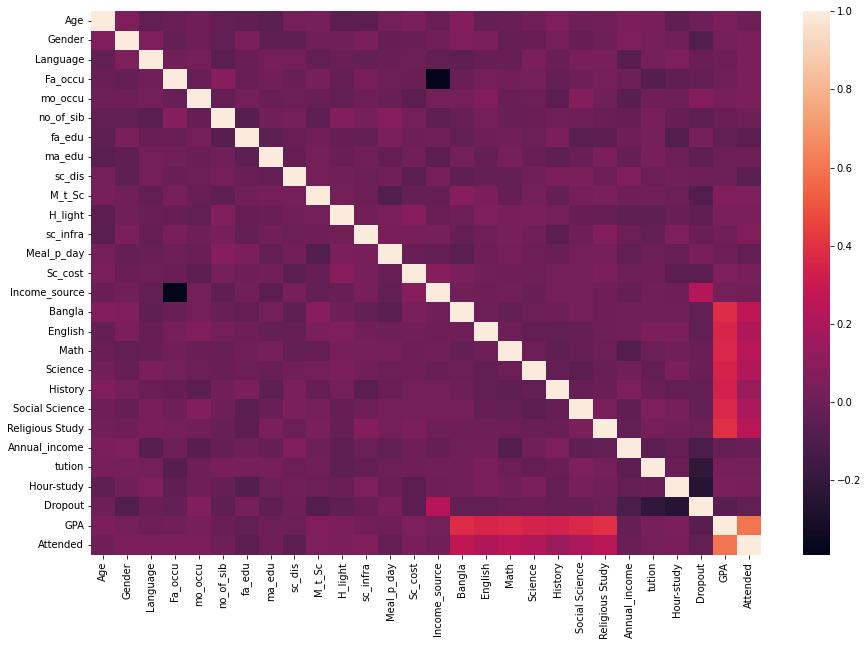

In [199]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr())

Text(0.5, 1.0, 'correlation')

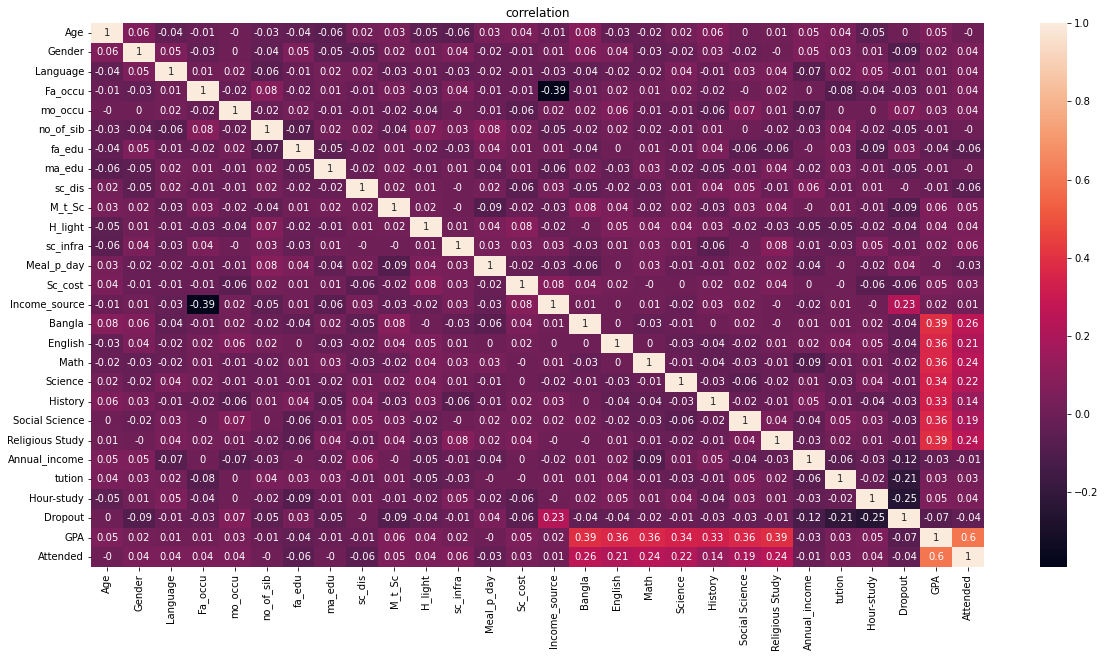

In [200]:
corr = df.corr().round(2)
plt.figure(figsize=(20,10))
plot = sns.heatmap(corr,annot=True)
plt.title('correlation')

In [201]:
x=df.drop('Dropout',axis=1)
y=df['Dropout']

In [202]:
df.Dropout.unique()

array([0, 1])

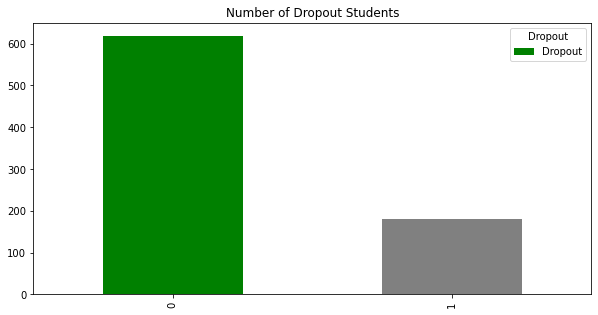

In [203]:
plt.figure(figsize=(10,5))
plt.title('Number of Dropout Students')

y.value_counts().plot(kind='bar',color=['green','gray'])
plt.legend(title='Dropout')
plt.show()

# Train-Test Split

In [204]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.3, random_state=45)

In [205]:
xtrain

,Age,Gender,Language,Fa_occu,mo_occu,no_of_sib,fa_edu,ma_edu,sc_dis,M_t_Sc,...,Math,Science,History,Social Science,Religious Study,Annual_income,tution,Hour-study,GPA,Attended
550,2,1,0,1,3,3,4,0,3,4,...,64,62,41,71,46,6,1,2,3.92,70.3
410,2,1,0,4,3,3,3,4,2,4,...,8,60,45,12,67,15,0,3,3.12,80.4
79,0,1,0,3,3,0,3,4,5,3,...,6,46,64,47,67,5,0,4,2.91,55.7
765,0,1,0,5,3,1,3,4,0,4,...,16,4,27,49,41,5,1,3,2.78,59.0
514,0,1,0,3,3,1,3,3,2,0,...,38,66,14,1,34,3,1,4,2.96,67.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,0,1,3,0,3,3,5,2,...,3,8,66,33,15,7,0,0,1.94,31.9
607,2,0,0,5,6,2,0,4,0,1,...,29,38,53,48,26,0,1,2,3.14,75.8
544,1,1,0,3,2,0,3,2,1,0,...,57,46,28,4,15,3,0,2,2.48,58.3
643,2,1,0,3,3,2,3,4,3,3,...,47,47,50,8,16,2,1,1,2.59,64.8


In [206]:
ytrain

550    0
410    0
79     0
765    0
514    0
      ..
725    0
607    1
544    1
643    0
414    0
Name: Dropout, Length: 559, dtype: int32

In [207]:
from sklearn.feature_selection import mutual_info_classif
mutual_info=mutual_info_classif(xtrain,ytrain)
mutual_info

array([0.01765236, 0.01124511, 0.        , 0.07314293, 0.03296089,
       0.        , 0.        , 0.        , 0.        , 0.0235311 ,
       0.01225847, 0.        , 0.0151712 , 0.        , 0.04091159,
       0.        , 0.        , 0.0135038 , 0.        , 0.00635619,
       0.00422373, 0.05396038, 0.01587345, 0.06022662, 0.05490846,
       0.00329839, 0.02954769])

In [208]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = xtrain.columns
mutual_info.sort_values(ascending=False)

Fa_occu            0.073143
tution             0.060227
Hour-study         0.054908
Religious Study    0.053960
Income_source      0.040912
mo_occu            0.032961
Attended           0.029548
M_t_Sc             0.023531
Age                0.017652
Annual_income      0.015873
Meal_p_day         0.015171
Math               0.013504
H_light            0.012258
Gender             0.011245
History            0.006356
Social Science     0.004224
GPA                0.003298
sc_dis             0.000000
fa_edu             0.000000
Language           0.000000
no_of_sib          0.000000
Science            0.000000
English            0.000000
Bangla             0.000000
ma_edu             0.000000
sc_infra           0.000000
Sc_cost            0.000000
dtype: float64

<AxesSubplot:>

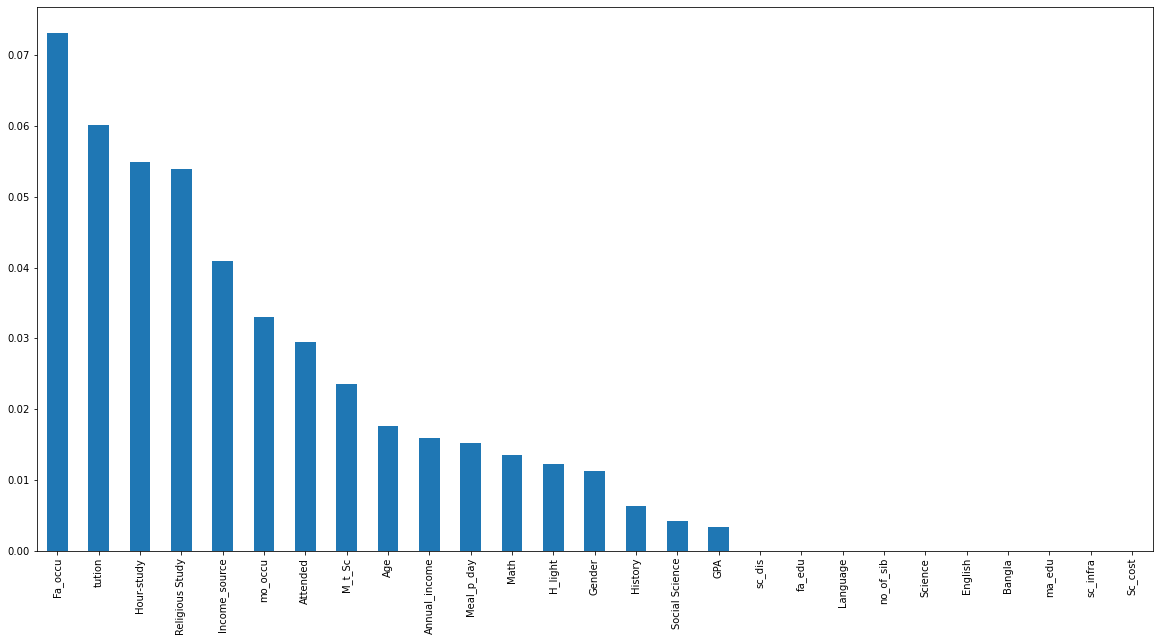

In [209]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20,10))

# Oversampling

In [210]:
from collections import Counter
from imblearn.under_sampling import NearMiss
ns=NearMiss(0.7)
x_res,y_res=ns.fit_resample(x,y)
print(Counter(y_res))

Counter({0: 257, 1: 180})


C:\Users\UseR\anaconda3\lib\site-packages\imblearn\utils\_validation.py:586: FutureWarning: Pass sampling_strategy=0.7 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


In [211]:
x

,Age,Gender,Language,Fa_occu,mo_occu,no_of_sib,fa_edu,ma_edu,sc_dis,M_t_Sc,...,Math,Science,History,Social Science,Religious Study,Annual_income,tution,Hour-study,GPA,Attended
0,2,0,0,1,3,3,4,1,0,1,...,55,31,63,62,34,10,0,1,3.66,80.4
1,3,1,0,0,3,2,4,4,0,2,...,43,11,57,68,72,5,1,2,3.18,65.1
2,0,1,0,4,0,1,4,4,5,3,...,53,52,18,33,9,2,0,0,2.69,56.2
3,1,0,0,5,3,3,1,4,3,2,...,71,65,24,36,32,8,0,2,3.23,75.0
4,1,0,1,2,3,0,3,4,2,4,...,66,65,35,36,50,5,0,3,3.33,71.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794,2,1,0,0,0,2,4,4,1,0,...,52,68,33,11,33,3,1,1,2.59,70.4
795,0,0,0,4,4,1,4,3,6,4,...,46,43,59,26,38,4,0,1,2.74,55.4
796,0,1,1,4,2,2,2,4,3,3,...,5,5,35,31,55,18,0,4,2.32,59.2
797,0,0,0,7,3,2,3,3,3,4,...,38,64,27,57,40,18,1,0,3.40,72.0


In [212]:
y.unique()

array([0, 1])

In [213]:
xotrain,xotest,yotrain,yotest=train_test_split(x_res,y_res,test_size=.3,random_state=45)

# Model Implementation

In [214]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
import xgboost as xgb

In [215]:
models={
    'RF':RandomForestClassifier(),
'adaBoost':AdaBoostClassifier(),
'GBC':GradientBoostingClassifier(),
'ExtraTree': ExtraTreesClassifier(),
'DT':DecisionTreeClassifier(),
'xgb':xgb.XGBClassifier(),
}

In [216]:
#getting the accuracy of the models

testaccuracy={}
from sklearn.metrics import precision_score,recall_score,f1_score, confusion_matrix
def acuracyTest(model,xtest,ytest,xtrain,ytrain):
  test_accuracy=0
  test_accuracy=model.score(xtest,ytest)
  print('test accuracy: %.2f'%test_accuracy)

  train_accuracy=0
  train_accuracy=model.score(xtrain,ytrain)
  print('train accuracy:%.2f'%train_accuracy)

  pred=model.predict(xtest)

  precision=precision_score(ytest,pred)
  
  recall=recall_score(ytest,pred)

  f1=f1_score(ytest,pred)
  print('precision:%.2f'%precision,'\n','recall:%.2f'%recall,'\n','f1%.2f'%f1)
  cMetrix=confusion_matrix(ytest,pred)
  return {'test':test_accuracy,'train':train_accuracy, 'p':precision,'r':recall,'f1':f1,'confusionM':cMetrix}



# Drawing Roc Curve

In [217]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
def plot_roc_curve(models,x_dtest,y_dtest):
  pred_d={}
  for k,v in models.items():
    pred_d[k]=v.predict(x_dtest)
  

  rocScore={}
  for k,v in pred_d.items():
    rocScore[k]=roc_auc_score(y_dtest,v)

  fp_tp_d={}
  for k,v in pred_d.items():
    fpr,tpr,_=roc_curve(y_dtest,v)
    fp_tp_d[k]={'fpr':fpr,'tpr':tpr}

  plt.figure(figsize=(12,10))
  titlestyle={'fontsize':25,'fontweight':'medium','color':'blue'}
  plt.title('Before Optimization Roc Curve',**titlestyle)
  for k,v in fp_tp_d.items():
    plt.plot(v['fpr'],v['tpr'],marker='.',label= k+": %.3f"%rocScore[k])
    kwargs={'fontsize':15,'fontweight':'demibold','color':'green'}
    plt.xlabel('False positive Rate',**kwargs)
    plt.ylabel('True POsitive Rate',**kwargs)
    size={'font'}
    plt.legend(fontsize='xx-large')
  plt.savefig(fname='Roc curve.png',format='png',transparent=True,bbox_inches=None, pad_inches=0.1)
  plt.show()

In [218]:
for k,v in models.items():
  v.fit(xotrain,yotrain)

In [219]:
for k,v in models.items():
  print(k,'  :  ',v.score(xotrain,yotrain))

RF   :   1.0
adaBoost   :   0.9377049180327869
GBC   :   1.0
ExtraTree   :   1.0
DT   :   1.0
xgb   :   1.0


In [220]:
for k,v in models.items():
  print(k,'  :  ',v.score(xotest,yotest))

RF   :   0.8636363636363636
adaBoost   :   0.7803030303030303
GBC   :   0.9621212121212122
ExtraTree   :   0.8560606060606061
DT   :   0.9090909090909091
xgb   :   0.946969696969697


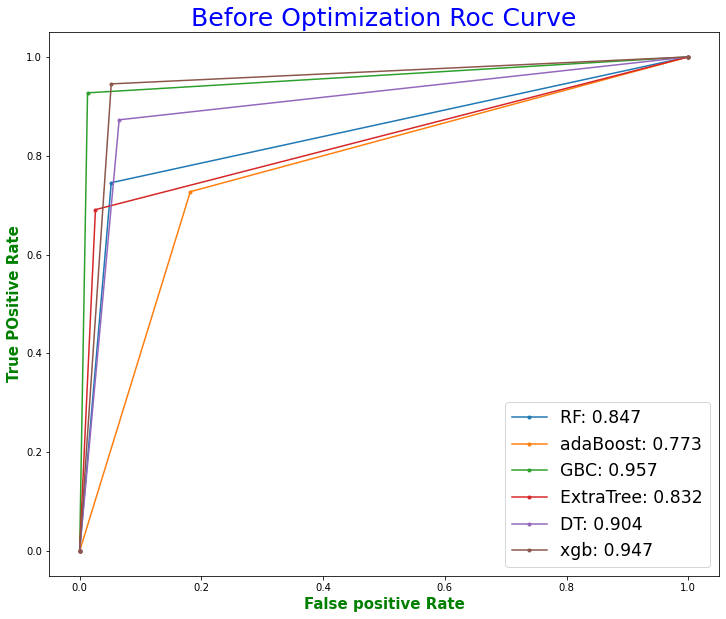

In [221]:
plot_roc_curve(models,xotest,yotest)

In [222]:
for k,v in models.items():
  print('---------------',k,'-----------------')
  acuracyTest(v,xotest,yotest,xotrain,yotrain)
  print()

--------------- RF -----------------
test accuracy: 0.86
train accuracy:1.00
precision:0.91 
 recall:0.75 
 f10.82

--------------- adaBoost -----------------
test accuracy: 0.78
train accuracy:0.94
precision:0.74 
 recall:0.73 
 f10.73

--------------- GBC -----------------
test accuracy: 0.96
train accuracy:1.00
precision:0.98 
 recall:0.93 
 f10.95

--------------- ExtraTree -----------------
test accuracy: 0.86
train accuracy:1.00
precision:0.95 
 recall:0.69 
 f10.80

--------------- DT -----------------
test accuracy: 0.91
train accuracy:1.00
precision:0.91 
 recall:0.87 
 f10.89

--------------- xgb -----------------
test accuracy: 0.95
train accuracy:1.00
precision:0.93 
 recall:0.95 
 f10.94



# Optimization

# Random Forest

# Randomized Search CV for Random Forest

In [223]:
from sklearn.model_selection import RandomizedSearchCV

In [490]:
#for RF

n_estimators =[i for i in range(300,900,1)]
criterion = ['entropy']
max_features = [None]
max_depth = [1,2,3,4,5,6,7,8,9,10]
min_samples_leaf = [1]
# min_samples_leaf = [i for i in range(1,10,1)]
max_leaf_nodes = [i for i in range(10,30,1)]
max_samples = [i for i in range(10,100,5)]
class_weight = [None]
min_samples_split = [2]



random_grid ={
    'n_estimators':n_estimators,
    'criterion' : criterion,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_leaf' : min_samples_leaf,
    'max_leaf_nodes' : max_leaf_nodes,
    'max_samples' : max_samples,
    'class_weight':class_weight,

    'min_samples_split' : min_samples_split
    # 'criterion':['gini','entropy'],
    # 'bootstrap':['False']
    
}


In [491]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,cv=15,verbose=2, random_state=45,n_jobs=-1)

In [492]:
rf_randomcv.fit(xotrain,yotrain)

Fitting 15 folds for each of 10 candidates, totalling 150 fits


RandomizedSearchCV(cv=15, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'class_weight': [None],
                                        'criterion': ['entropy'],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10],
                                        'max_features': [None],
                                        'max_leaf_nodes': [10, 11, 12, 13, 14,
                                                           15, 16, 17, 18, 19,
                                                           20, 21, 22, 23, 24,
                                                           25, 26, 27, 28, 29],
                                        'max_samples': [10, 15, 20, 25, 30, 35,
                                                        40, 45, 50, 55, 60, 65,
                                                        70, 75, 80, 85, 90,
                                                        95],
                                        'min_samples_leaf': [1],
                                        'min_samples_split': [2],
                                        'n_estimators': [300, 301, 302, 303,
                                                         304, 305, 306, 307,
                                                         308, 309, 310, 311,
                                                         312, 313, 314, 315,
                                                         316, 317, 318, 319,
                                                         320, 321, 322, 323,
                                                         324, 325, 326, 327,
                                                         328, 329, ...]},
                   random_state=45, verbose=2)

In [493]:
rf_randomcv.best_params_

{'n_estimators': 473,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_samples': 95,
 'max_leaf_nodes': 17,
 'max_features': None,
 'max_depth': 5,
 'criterion': 'entropy',
 'class_weight': None}

In [494]:
rf_best_randomgrid=rf_randomcv.best_estimator_

In [495]:
acuracyTest(rf_randomcv.best_estimator_,xotest,yotest,xotrain,yotrain)

test accuracy: 0.83
train accuracy:0.97
precision:0.92 
 recall:0.65 
 f10.77


{'test': 0.8333333333333334,
 'train': 0.9704918032786886,
 'p': 0.9230769230769231,
 'r': 0.6545454545454545,
 'f1': 0.7659574468085106,
 'confusionM': array([[74,  3],
        [19, 36]], dtype=int64)}

In [230]:
# import joblib

In [231]:
# joblib.dump(rf_randomcv, 'rf_randomcv.pkl')

In [232]:
# rf_randomcv = joblib.load('rf_randomcv.pkl')

In [233]:
# acuracyTest(rf_randomcv.best_estimator_,xotest,yotest,xotrain,yotrain)

# Grid Search CV for Random Forest

In [234]:
from sklearn.model_selection import GridSearchCV

In [235]:

n_estimators =[1855]
max_features=[None]
max_depth = [x for x in range(950,1050)]


random_grid ={
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,

    # # 'criterion':['gini','entropy'],
    # 'bootstrap':['False']
    
}
rf_gridcv=GridSearchCV(estimator=RandomForestClassifier(),param_grid=random_grid,cv=3,verbose=2,n_jobs=-1)

In [236]:
rf_gridcv.fit(xotrain,yotrain)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [950, 951, 952, 953, 954, 955, 956, 957,
                                       958, 959, 960, 961, 962, 963, 964, 965,
                                       966, 967, 968, 969, 970, 971, 972, 973,
                                       974, 975, 976, 977, 978, 979, ...],
                         'max_features': [None], 'n_estimators': [1855]},
             verbose=2)

In [237]:
rf_gridcv.best_params_

{'max_depth': 969, 'max_features': None, 'n_estimators': 1855}

In [238]:
rf_gridcv.best_estimator_

RandomForestClassifier(max_depth=969, max_features=None, n_estimators=1855)

In [239]:
acuracyTest(rf_gridcv.best_estimator_,xotest,yotest,xotrain,yotrain)

test accuracy: 0.97
train accuracy:1.00
precision:0.98 
 recall:0.95 
 f10.96


{'test': 0.9696969696969697,
 'train': 1.0,
 'p': 0.9811320754716981,
 'r': 0.9454545454545454,
 'f1': 0.9629629629629629,
 'confusionM': array([[76,  1],
        [ 3, 52]], dtype=int64)}

In [240]:
1,.1,.01,.001,.0001

(1, 0.1, 0.01, 0.001, 0.0001)

In [241]:
for i in range(1,6):
  print(10/10**i)

1.0
0.1
0.01
0.001
0.0001


In [242]:
# joblib.dump(rf_gridcv, 'rf_gridcv.pkl')

In [243]:
# rfgs = joblib.load('rf_gridcv.pkl')

In [244]:
# acuracyTest(rfgs.best_estimator_,xotest,yotest,xotrain,yotrain)

# Randomized Search for AdaBoost

In [245]:
from sklearn.model_selection import RandomizedSearchCV

RF=RandomForestClassifier()
gcb=GradientBoostingClassifier()

grid={
   
    'n_estimators':[65],
    'learning_rate':[.1,.2,.3,.4,.5,.6,.7,.8,.9],
    'base_estimator':[gcb],
    'random_state':[5],
    'algorithm': ['SAMME']
    
}
ada_rso=RandomizedSearchCV(estimator=AdaBoostClassifier(),param_distributions=grid,n_jobs=-1,cv=10,scoring='accuracy')
ada_rso.fit(xotrain,yotrain)

C:\Users\UseR\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=10, estimator=AdaBoostClassifier(), n_jobs=-1,
                   param_distributions={'algorithm': ['SAMME'],
                                        'base_estimator': [GradientBoostingClassifier()],
                                        'learning_rate': [0.1, 0.2, 0.3, 0.4,
                                                          0.5, 0.6, 0.7, 0.8,
                                                          0.9],
                                        'n_estimators': [65],
                                        'random_state': [5]},
                   scoring='accuracy')

In [246]:
ada_rso.best_params_

{'random_state': 5,
 'n_estimators': 65,
 'learning_rate': 0.1,
 'base_estimator': GradientBoostingClassifier(),
 'algorithm': 'SAMME'}

In [247]:
ada_rso.best_estimator_

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=GradientBoostingClassifier(),
                   learning_rate=0.1, n_estimators=65, random_state=5)

In [248]:
acuracyTest(ada_rso.best_estimator_,xotest,yotest,xotrain,yotrain)

test accuracy: 0.96
train accuracy:1.00
precision:0.98 
 recall:0.93 
 f10.95


{'test': 0.9621212121212122,
 'train': 1.0,
 'p': 0.9807692307692307,
 'r': 0.9272727272727272,
 'f1': 0.9532710280373831,
 'confusionM': array([[76,  1],
        [ 4, 51]], dtype=int64)}

In [249]:
# joblib.dump(ada_rso, 'ada_randomCv.pkl')

In [250]:
# ada_randomcv = joblib.load('ada_randomCv.pkl')

In [251]:
# acuracyTest(ada_randomcv.best_estimator_,xotest,yotest,xotrain,yotrain)

# Grid Search For AdaBoost

In [252]:
params={
    'n_estimators':[i for i in range(100,1500,10)],
    'learning_rate':[1,.1,.2,.3,.4,.5,.6,.7,.8,.9,.01,.001,.0001],
    'algorithm':['SAMME','SAMME.R'],
    'base_estimator':[DT,gcb]}
ada_gsCV=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=params,n_jobs=-1,cv=10,scoring='accuracy')
ada_gsCV.fit(xotrain,yotrain)

GridSearchCV(cv=10, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'base_estimator': [DecisionTreeClassifier(),
                                            GradientBoostingClassifier()],
                         'learning_rate': [1, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,
                                           0.8, 0.9, 0.01, 0.001, 0.0001],
                         'n_estimators': [100, 110, 120, 130, 140, 150, 160,
                                          170, 180, 190, 200, 210, 220, 230,
                                          240, 250, 260, 270, 280, 290, 300,
                                          310, 320, 330, 340, 350, 360, 370,
                                          380, 390, ...]},
             scoring='accuracy')

In [253]:
ada_gsCV.best_params_

{'algorithm': 'SAMME',
 'base_estimator': GradientBoostingClassifier(),
 'learning_rate': 1,
 'n_estimators': 120}

In [254]:
ada_gsCV.best_estimator_

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=GradientBoostingClassifier(), learning_rate=1,
                   n_estimators=120)

In [255]:
acuracyTest(ada_gsCV.best_estimator_,xotest,yotest,xotrain,yotrain)

test accuracy: 0.96
train accuracy:1.00
precision:0.98 
 recall:0.93 
 f10.95


{'test': 0.9621212121212122,
 'train': 1.0,
 'p': 0.9807692307692307,
 'r': 0.9272727272727272,
 'f1': 0.9532710280373831,
 'confusionM': array([[76,  1],
        [ 4, 51]], dtype=int64)}

In [256]:
# joblib.dump(ada_gsCV, 'ada_gridCv.pkl')

In [257]:
# ada_gridcv = joblib.load('ada_gridCv.pkl')

In [258]:
# acuracyTest(ada_gridcv.best_estimator_,xotest,yotest,xotrain,yotrain)

# Randomized Search CV for GBC

In [562]:
param_grid={
  'loss':['log_loss'],
    'learning_rate':[.5],
    'n_estimators':[400],
    'criterion':['friedman_mse'],
    'min_samples_split':[4,5,6,7,8],
    'min_samples_leaf':[1,2,3,4,5,6,7,8],
    'max_depth':[12],
    'max_features':['sqrt'],
    'subsample':[1.0],
}

In [563]:
gbc_rcv=RandomizedSearchCV(estimator=GradientBoostingClassifier(),param_distributions=param_grid,cv=15,n_jobs=-1,random_state=42)

In [564]:
gbc_rcv.fit(xotrain,yotrain)

RandomizedSearchCV(cv=15, estimator=GradientBoostingClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['friedman_mse'],
                                        'learning_rate': [0.5],
                                        'loss': ['log_loss'], 'max_depth': [12],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8],
                                        'min_samples_split': [4, 5, 6, 7, 8],
                                        'n_estimators': [400],
                                        'subsample': [1.0]},
                   random_state=42)

In [565]:
gbc_rcv.best_params_

{'subsample': 1.0,
 'n_estimators': 400,
 'min_samples_split': 6,
 'min_samples_leaf': 3,
 'max_features': 'sqrt',
 'max_depth': 12,
 'loss': 'log_loss',
 'learning_rate': 0.5,
 'criterion': 'friedman_mse'}

In [566]:
gbc_rcv.best_estimator_

GradientBoostingClassifier(learning_rate=0.5, max_depth=12, max_features='sqrt',
                           min_samples_leaf=3, min_samples_split=6,
                           n_estimators=400)

In [567]:
acuracyTest(gbc_rcv,xotest,yotest,xotrain,yotrain)

test accuracy: 0.92
train accuracy:1.00
precision:0.91 
 recall:0.89 
 f10.90


{'test': 0.9166666666666666,
 'train': 1.0,
 'p': 0.9074074074074074,
 'r': 0.8909090909090909,
 'f1': 0.8990825688073394,
 'confusionM': array([[72,  5],
        [ 6, 49]], dtype=int64)}

In [265]:
# joblib.dump(gbc, 'gbc_randomcv.pkl')

In [266]:
# gbc_randomcv = joblib.load('gbc_randomcv.pkl')

In [267]:
# acuracyTest(gbc_randomcv,xotest,yotest,xotrain,yotrain)

# Grid Search CV for GBC

In [268]:
param_grid={
    
    'learning_rate':[.1,1,.01],
    'n_estimators':[100,300,400,500],
    
    # 'min_samples_split':[1,2,5,8,10],
    # 'min_samples_leaf':[1,2,3,5,8],
    # 'max_depth':[1,5,8,10],
    # 'max_features':['auto', 'sqrt', 'log2']
}

In [269]:
gbc_gcv=GridSearchCV(estimator=GradientBoostingClassifier(),param_grid=param_grid,cv=3,n_jobs=-1)

In [270]:
gbc_gcv.fit(xotrain,yotrain)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 1, 0.01],
                         'n_estimators': [100, 300, 400, 500]})

In [271]:
gbc_gcv.best_params_

{'learning_rate': 0.1, 'n_estimators': 100}

In [272]:
gbc_gcv.best_estimator_

GradientBoostingClassifier()

In [273]:
acuracyTest(gbc_gcv,xotest,yotest,xotrain,yotrain)

test accuracy: 0.96
train accuracy:1.00
precision:0.98 
 recall:0.93 
 f10.95


{'test': 0.9621212121212122,
 'train': 1.0,
 'p': 0.9807692307692307,
 'r': 0.9272727272727272,
 'f1': 0.9532710280373831,
 'confusionM': array([[76,  1],
        [ 4, 51]], dtype=int64)}

In [274]:
# joblib.dump(gbc_gcv, 'gbc_gridcv.pkl')

In [275]:
# gbc_gridcv = joblib.load('gbc_gridcv.pkl')

In [276]:
# acuracyTest(gbc_gridcv,xotest,yotest,xotrain,yotrain)

# Randomized Search CV for ExtraTree

In [277]:
param_grid={
    # 'loss':['log_loss','deviance','exponential'],
    
    'n_estimators':[100,500,800,900,1100,1200,1000,1500],
    'criterion':['gini', 'entropy'],
    'min_samples_split':[1,2,5,8,10],
    'min_samples_leaf':[1,2,3,5,8,10,15,17],
    'max_depth':[1,5,10,20,30,50],
    'max_features':['None', 'sqrt', 'log2']


}

In [278]:
ex_rcv=RandomizedSearchCV(estimator=ExtraTreesClassifier(),param_distributions=param_grid,n_iter=10,cv=10,n_jobs=-1)

In [279]:
ex_rcv.fit(xotrain,yotrain)

C:\Users\UseR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\UseR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\UseR\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 476, in fit
    trees = Parallel(
  File "C:\Users\UseR\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\UseR\anaconda3\lib\site-packages\joblib

RandomizedSearchCV(cv=10, estimator=ExtraTreesClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 5, 10, 20, 30, 50],
                                        'max_features': ['None', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 3, 5, 8, 10,
                                                             15, 17],
                                        'min_samples_split': [1, 2, 5, 8, 10],
                                        'n_estimators': [100, 500, 800, 900,
                                                         1100, 1200, 1000,
                                                         1500]})

In [280]:
ex_rcv.best_params_

{'n_estimators': 1500,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 10,
 'criterion': 'entropy'}

In [281]:
ex_rcv.best_estimator_

ExtraTreesClassifier(criterion='entropy', max_depth=10, n_estimators=1500)

In [282]:
acuracyTest(ex_rcv.best_estimator_,xotest,yotest,xotrain,yotrain)

test accuracy: 0.86
train accuracy:1.00
precision:1.00 
 recall:0.67 
 f10.80


{'test': 0.8636363636363636,
 'train': 1.0,
 'p': 1.0,
 'r': 0.6727272727272727,
 'f1': 0.8043478260869564,
 'confusionM': array([[77,  0],
        [18, 37]], dtype=int64)}

In [283]:
# joblib.dump(ex_rcv, 'ex_randomcv.pkl')

In [284]:
# ex_random = joblib.load('ex_randomcv.pkl')

In [285]:
# acuracyTest(ex_random.best_estimator_,xotest,yotest,xotrain,yotrain)

# Grid Search CV for ExtraTree

In [286]:
param_grid={
    # 'loss':['log_loss','deviance','exponential'],
    
    'n_estimators':[1,100,500,1000,1500],
    # # 'criterion':['gini', 'entropy', 'log_loss'],
    # # 'min_samples_split':[1,2,5,8,10],
    # # 'min_samples_leaf':[1,2,3,5,8],
    'max_depth':[1,5,10]
    # 'max_features':['None', 'sqrt', 'log2']


}
ex_gcv=GridSearchCV(estimator=ExtraTreesClassifier(),param_grid=param_grid,cv=3,n_jobs=-1)

In [287]:
ex_gcv.fit(xotrain,yotrain)

GridSearchCV(cv=3, estimator=ExtraTreesClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 5, 10],
                         'n_estimators': [1, 100, 500, 1000, 1500]})

In [288]:
ex_gcv.fit(xotrain,yotrain)

GridSearchCV(cv=3, estimator=ExtraTreesClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 5, 10],
                         'n_estimators': [1, 100, 500, 1000, 1500]})

In [289]:
ex_gcv.fit(xotrain,yotrain)

GridSearchCV(cv=3, estimator=ExtraTreesClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 5, 10],
                         'n_estimators': [1, 100, 500, 1000, 1500]})

In [290]:
ex_gcv.best_params_

{'max_depth': 10, 'n_estimators': 1000}

In [291]:
ex_gcv.best_estimator_

ExtraTreesClassifier(max_depth=10, n_estimators=1000)

In [292]:
acuracyTest(ex_gcv.best_estimator_,xotest,yotest,xotrain,yotrain)

test accuracy: 0.84
train accuracy:1.00
precision:0.95 
 recall:0.65 
 f10.77


{'test': 0.8409090909090909,
 'train': 1.0,
 'p': 0.9473684210526315,
 'r': 0.6545454545454545,
 'f1': 0.7741935483870966,
 'confusionM': array([[75,  2],
        [19, 36]], dtype=int64)}

In [293]:
# joblib.dump(ex_gcv, 'ex_gridcv.pkl')

In [294]:
# ex_grid = joblib.load('ex_gridcv.pkl')

In [295]:
# acuracyTest(ex_grid.best_estimator_,xotest,yotest,xotrain,yotrain)

# Randomized Search CV for Decision Tree

In [632]:
param_grid={
    'criterion':['gini'],
    'splitter':['best'],
    'min_samples_split':[1,2,3,4,5,6,7,8,9],
    'min_samples_leaf':[1],
    
    

    #'max_features':['auto', 'sqrt', 'log2'],
    #'max_leaf_nodes':[x for x in range(800,900,1)],


}
dt_rcv=RandomizedSearchCV(estimator=DecisionTreeClassifier(),param_distributions=param_grid,cv=10,n_jobs=-1)

In [633]:
dt_rcv.fit(xotrain,yotrain)

C:\Users\UseR\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\UseR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\UseR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\UseR\anaconda3\lib\site-packages\sklearn\tree\_classes.py",

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini'],
                                        'min_samples_leaf': [1],
                                        'min_samples_split': [1, 2, 3, 4, 5, 6,
                                                              7, 8, 9],
                                        'splitter': ['best']})

In [634]:
dt_rcv.best_params_

{'splitter': 'best',
 'min_samples_split': 8,
 'min_samples_leaf': 1,
 'criterion': 'gini'}

In [635]:
dt_rcv.best_estimator_

DecisionTreeClassifier(min_samples_split=8)

In [636]:
acuracyTest(dt_rcv.best_estimator_,xotest,yotest,xotrain,yotrain)

test accuracy: 0.93
train accuracy:0.97
precision:0.94 
 recall:0.89 
 f10.92


{'test': 0.9318181818181818,
 'train': 0.9737704918032787,
 'p': 0.9423076923076923,
 'r': 0.8909090909090909,
 'f1': 0.9158878504672897,
 'confusionM': array([[74,  3],
        [ 6, 49]], dtype=int64)}

In [301]:
# joblib.dump(dt_rcv, 'dt_randomcv.pkl')

In [302]:
# dt_random  = joblib.load('dt_randomcv.pkl')

In [303]:
# acuracyTest(dt_random.best_estimator_,xotest,yotest,xotrain,yotrain)

# Grid Search CV for Decision Tree

In [304]:
param_grid={
    'criterion':['gini','entropy'],
    'splitter':['best','random'],
    
    'min_samples_split':[15],
    'min_samples_leaf':[3],
   
    'max_leaf_nodes':[x for x in range(1,1000)]


}
dt_gcv=GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=param_grid,cv=10,n_jobs=-1)

In [305]:
dt_gcv.fit(xotrain,yotrain)

C:\Users\UseR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
40 fits failed out of a total of 39960.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\UseR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\UseR\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 969, in fit
    super().fit(
  File "C:\Users\UseR\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 350, in fit
    check_scalar(
  File "C:\Users\UseR\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 1

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_leaf_nodes': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                            12, 13, 14, 15, 16, 17, 18, 19, 20,
                                            21, 22, 23, 24, 25, 26, 27, 28, 29,
                                            30, ...],
                         'min_samples_leaf': [3], 'min_samples_split': [15],
                         'splitter': ['best', 'random']})

In [306]:
dt_gcv.best_params_

{'criterion': 'entropy',
 'max_leaf_nodes': 15,
 'min_samples_leaf': 3,
 'min_samples_split': 15,
 'splitter': 'best'}

In [307]:
dt_gcv.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=15,
                       min_samples_leaf=3, min_samples_split=15)

In [308]:
acuracyTest(dt_gcv.best_estimator_,xotest,yotest,xotrain,yotrain)

test accuracy: 0.92
train accuracy:0.95
precision:0.91 
 recall:0.89 
 f10.90


{'test': 0.9166666666666666,
 'train': 0.9540983606557377,
 'p': 0.9074074074074074,
 'r': 0.8909090909090909,
 'f1': 0.8990825688073394,
 'confusionM': array([[72,  5],
        [ 6, 49]], dtype=int64)}

In [309]:
# joblib.dump(dt_gcv,'dt_gridcv.pkl')

In [310]:
# dt_gridcv = joblib.load('dt_gridcv.pkl')

In [311]:
# acuracyTest(dt_gridcv.best_estimator_,xotest,yotest,xotrain,yotrain)

# Randomized Search CV for XGBoost

In [312]:
# pip install xgboost

In [313]:
import xgboost as xgb

In [314]:
xgb = xgb.XGBClassifier()

In [637]:
params = {
 'learning_rate' : [0.05,0.10,0.15,0.20,0.25,0.30],
 'max_depth' : [ 3, 4, 5, 6, 8, 10, 12, 15],
 'min_child_weight' : [ 1, 3, 5, 7 ],
 'gamma': [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],

    #'colsample_bytree' : [ 0.3, 0.4, 0.5 , 0.7 ]
}
xgb_rcv=RandomizedSearchCV(xgb,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [638]:
xgb_rcv.fit(xotrain,yotrain)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

In [639]:
xgb_rcv.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.2, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.3, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=4, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [640]:
acuracyTest(xgb_rcv,xotest,yotest,xotrain,yotrain)

test accuracy: 0.96
train accuracy:1.00
precision:0.96 
 recall:0.95 
 f10.95


{'test': 0.9610389610389609,
 'train': 1.0,
 'p': 0.9629629629629629,
 'r': 0.9454545454545454,
 'f1': 0.9541284403669724,
 'confusionM': array([[75,  2],
        [ 3, 52]], dtype=int64)}

# Grid Search CV for XGBoost

In [319]:
from xgboost import XGBClassifier

In [641]:
params = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),

    #'learning_rate': [0.1, 0.01, 0.05]
}

In [642]:
estimator = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)

In [643]:
xgb_gcv = GridSearchCV(
    estimator=estimator,
    param_grid=params,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 10,
    verbose=True
)

In [644]:
xgb_gcv.fit(xotrain,yotrain)

Fitting 10 folds for each of 32 candidates, totalling 320 fits


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, predictor=None, ...),
             n_jobs=10,
             param_grid={'max_depth': range(2, 10),
                         'n_estimators': range(60, 220, 40)},
             scoring='roc_auc', verbose=True)

In [645]:
xgb_gcv.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=60, n_jobs=4,
              nthread=4, num_parallel_tree=1, predictor='auto', ...)

In [646]:
acuracyTest(xgb_gcv,xotest,yotest,xotrain,yotrain)

test accuracy: 0.96
train accuracy:1.00
precision:0.96 
 recall:0.95 
 f10.95


{'test': 0.9577331759149941,
 'train': 1.0,
 'p': 0.9629629629629629,
 'r': 0.9454545454545454,
 'f1': 0.9541284403669724,
 'confusionM': array([[75,  2],
        [ 3, 52]], dtype=int64)}